In this notebook we annalyse results of the main experiments

Summarizing results

Each experiment has a df

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#NBEATS Raw
folder_path = "/gpfs/home5/talkanbar/Metrics"
file_name3 = "metrics_df_one4all_goodsymbols_raw_NB.pkl"
file_path = os.path.join(folder_path, file_name3)
nbeats1 = pd.read_pickle(file_path)

In [3]:
#NBEATS All features
file_name3 = "metrics_df_one4all_goodsymbols_allfeatures_NB.pkl"
file_path = os.path.join(folder_path, file_name3)
nbeats2 = pd.read_pickle(file_path)

In [4]:
#LSTM Raw
file_name3 = "metrics_df_one4all_goodsymbols_raw_RNN.pkl"
file_path = os.path.join(folder_path, file_name3)
rnn1 = pd.read_pickle(file_path)

In [5]:
#LSTM All features
file_name3 = "metrics_df_one4all_goodsymbols_allfeatures_RNN.pkl"
file_path = os.path.join(folder_path, file_name3)
rnn2 = pd.read_pickle(file_path)

In [6]:
rnn1.columns = rnn1.columns.str.replace('_RNN', '')
rnn2.columns = rnn2.columns.str.replace('_RNN', '')

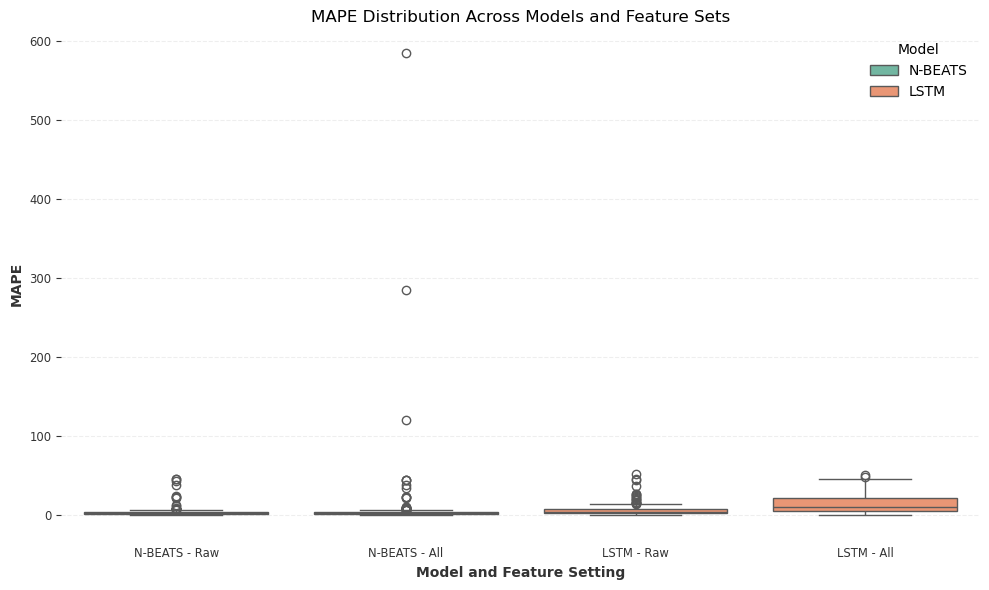

In [7]:
nbeats1['Model'] = 'N-BEATS'
nbeats1['Features'] = 'Raw'
nbeats2['Model'] = 'N-BEATS'
nbeats2['Features'] = 'All'
rnn1['Model'] = 'LSTM'
rnn1['Features'] = 'Raw'
rnn2['Model'] = 'LSTM'
rnn2['Features'] = 'All'

combined_df = pd.concat([nbeats1, nbeats2, rnn1, rnn2], ignore_index=True)
combined_df['Setting'] = combined_df['Model'] + ' - ' + combined_df['Features']

#  MAPE 
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Setting', y='MAPE', hue='Model', palette='Set2')

plt.title('MAPE Distribution Across Models and Feature Sets')
plt.ylabel('MAPE')
plt.xlabel('Model and Feature Setting')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


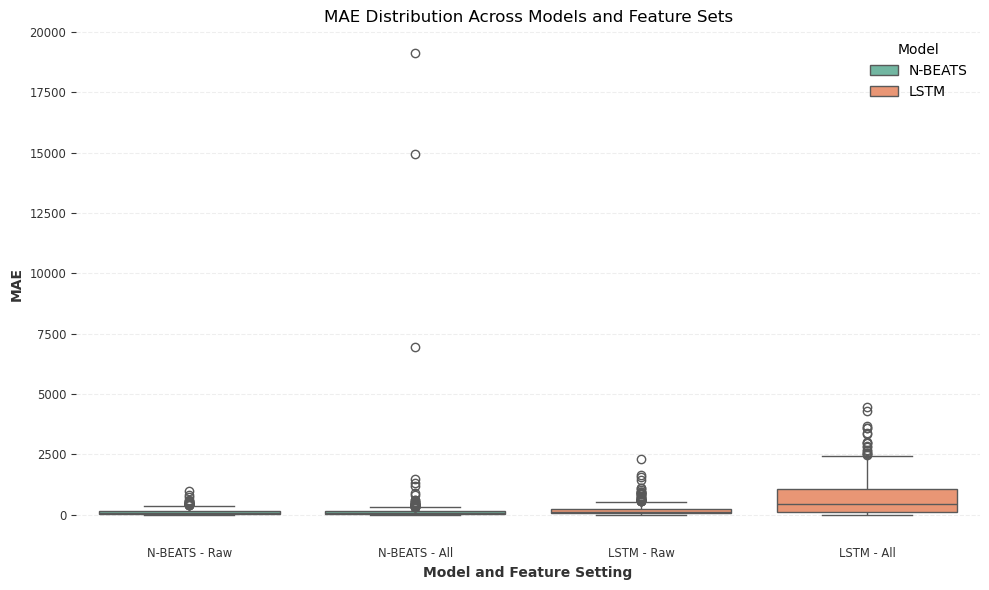

In [9]:
#  MAE 
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Setting', y='MAE', hue='Model', palette='Set2')

plt.title('MAE Distribution Across Models and Feature Sets')
plt.ylabel('MAE')
plt.xlabel('Model and Feature Setting')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

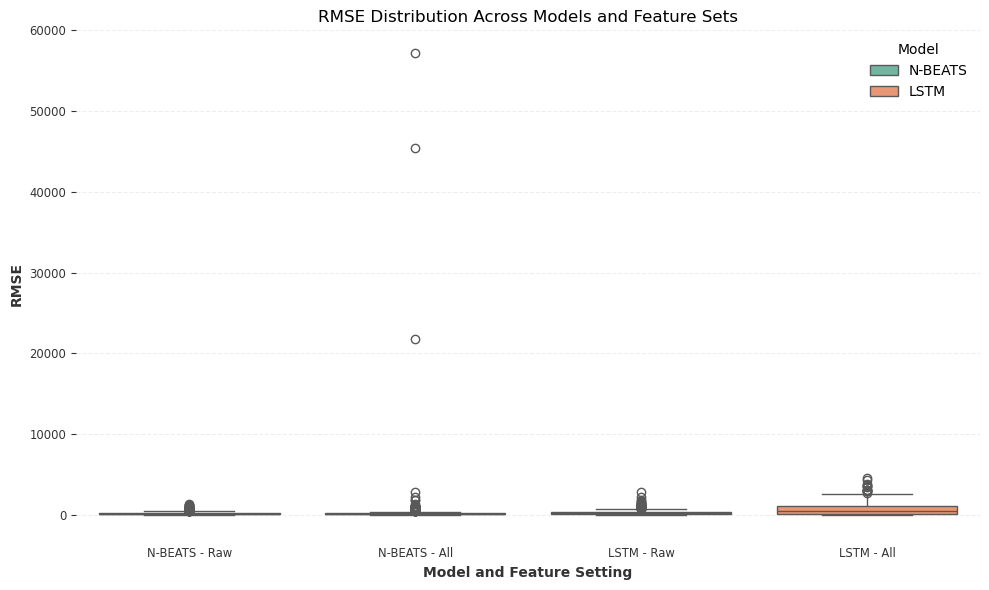

In [10]:
#  RMSE 
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Setting', y='RMSE', hue='Model', palette='Set2')

plt.title('RMSE Distribution Across Models and Feature Sets')
plt.ylabel('RMSE')
plt.xlabel('Model and Feature Setting')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

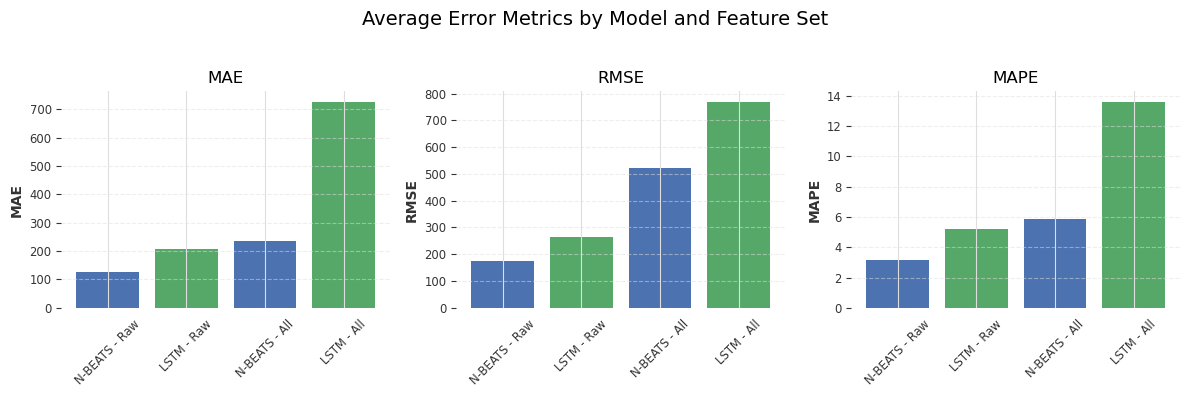

In [8]:
#All metrics
ordered_settings = ['N-BEATS - Raw', 'LSTM - Raw', 'N-BEATS - All', 'LSTM - All']
model_colors = {
    'N-BEATS - Raw': '#4C72B0',
    'N-BEATS - All': '#4C72B0',
    'LSTM - Raw': '#55A868',
    'LSTM - All': '#55A868'
}

avg_metrics = (
    combined_df
    .groupby('Setting')[['MAE', 'RMSE', 'MAPE']]
    .mean()
    .reindex(ordered_settings)
    .round(2)
)

# Plot
metrics = ['MAE', 'RMSE', 'MAPE']
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

for i, metric in enumerate(metrics):
    bars = axes[i].bar(
        avg_metrics.index,
        avg_metrics[metric],
        color=[model_colors[setting] for setting in avg_metrics.index]
    )
    axes[i].set_title(f'{metric}')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

fig.suptitle('Average Error Metrics by Model and Feature Set', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -------------------------------------------

In [22]:
#results for reporting: First Experiment
rnn_stats = rnn_raw[['MAE', 'RMSE', 'MAPE']].agg(['mean', 'std'])
nbeats_stats = nbeats_raw[['MAE', 'RMSE', 'MAPE']].agg(['mean', 'std'])
rnn_formatted = rnn_stats.loc['mean'].round(2).astype(str) + " ± " + rnn_stats.loc['std'].round(2).astype(str)
nbeats_formatted = nbeats_stats.loc['mean'].round(2).astype(str) + " ± " + nbeats_stats.loc['std'].round(2).astype(str)
comparison_table = pd.DataFrame([rnn_formatted, nbeats_formatted], index=['RNN', 'N-BEATS'])
comparison_table.index.name = 'Model'
comparison_table

,MAE,RMSE,MAPE
Model,,,
RNN,209.22 ± 260.16,265.26 ± 335.05,5.2 ± 5.96
N-BEATS,128.06 ± 135.73,172.93 ± 211.64,3.17 ± 4.95


In [23]:
#results for reporting: Second Experiment
rnn_stats = rnn_features[['MAE', 'RMSE', 'MAPE']].agg(['mean', 'std'])
nbeats_stats = nbeats_features[['MAE', 'RMSE', 'MAPE']].agg(['mean', 'std'])
rnn_formatted = rnn_stats.loc['mean'].round(2).astype(str) + " ± " + rnn_stats.loc['std'].round(2).astype(str)
nbeats_formatted = nbeats_stats.loc['mean'].round(2).astype(str) + " ± " + nbeats_stats.loc['std'].round(2).astype(str)
comparison_table = pd.DataFrame([rnn_formatted, nbeats_formatted], index=['RNN', 'N-BEATS'])
comparison_table.index.name = 'Model'
comparison_table

,MAE,RMSE,MAPE
Model,,,
RNN,727.66 ± 815.6,769.67 ± 835.4,13.61 ± 11.03
N-BEATS,234.74 ± 1310.13,522.25 ± 3950.65,5.87 ± 34.52


Out of curiosity we track some worse performing symbols (e.g. from N-Beats with Featurs) and track how they did in other settings.

In [8]:
nbeats_features_sorted = nbeats2.sort_values(by='MAPE', ascending=False)
nbeats_features_sorted

,Symbol,MAE,RMSE,MAPE
186,BTC-22JAN25-109000-P,19104.833984,57143.914062,584.582153
188,BTC-22JAN25-111000-P,14939.898438,45363.359375,284.639709
171,BTC-22JAN25-100000-C,6938.865234,21798.564453,120.660324
347,BTC-8JAN25-103500-P,344.617401,956.008545,44.553974
215,BTC-24JAN25-89000-C,323.251312,545.636719,44.483555
...,...,...,...,...
312,BTC-5JAN25-88000-C,20.056593,26.285301,0.193464
296,BTC-4JAN25-82000-C,27.771303,36.834103,0.172695
298,BTC-4JAN25-86000-C,17.409277,24.391100,0.144160
280,BTC-3JAN25-122000-P,35.369503,45.414230,0.139725


In [9]:
#We can also see results per symbol, how did it do in various settings

dfs = {
    'nbeats_features': nbeats2,
    'rnn_features': rnn2,
    'nbeats_raw': nbeats1,
    'rnn_raw': rnn1
}

for df_name, df in dfs.items():
    if 'Symbol' in df.columns:
        print(f"\n{df_name} / BTC-22JAN25-109000-P:")
        filtered_df = df[df['Symbol'] == 'BTC-22JAN25-109000-P']
        if filtered_df.empty:
            print("No matching rows")
        else:
            print(filtered_df)
    else:
        print(f"\n{df_name} does not have a 'Symbol' column")


nbeats_features / BTC-22JAN25-109000-P:
                   Symbol           MAE          RMSE        MAPE
186  BTC-22JAN25-109000-P  19104.833984  57143.914062  584.582153

rnn_features / BTC-22JAN25-109000-P:
                   Symbol         MAE        RMSE      MAPE
186  BTC-22JAN25-109000-P  103.369095  242.147217  2.855163

nbeats_raw / BTC-22JAN25-109000-P:
                   Symbol         MAE       RMSE      MAPE
186  BTC-22JAN25-109000-P  142.063644  324.67984  3.947109

rnn_raw / BTC-22JAN25-109000-P:
                   Symbol         MAE        RMSE     MAPE
186  BTC-22JAN25-109000-P  165.597534  329.839722  4.58378


Important to note that what we have reported in the paper is the average error metrics, sometimes symbols have a different pattern. The symbol above is an example, its best performance is with rnn_features and worse was with nbeats_features.